<h1>TP4: Algorithme de recherche Grover</h1>  
<h2>Introduction à l’algorithme de recherche de 
Grover</h2>  

La premère étape de ce tp consiste à bien comprendre le problème de recherche représenté de manière quantique afin de pouvoir y applique le fameux algorithme de groover. 
Pour cela, l'algorithme de recherche de Grover est présenté dans l'énoncé du tp. On comprend que cet algorithme peut être décomposé en deux composants principaux : le premier 
est appelé l'oracle de Grover et le second est l'opérateur de diffusion de Grover. On nous donne une solution d'implémentation de l’algorithme de recherche de 
Grover en ulisant 3 qubits et pouvant donc trouvé un élément parmis $2^3 = 8$ éléments.  
Nous allons donc suivre les étape de cette implémentation et la tester via un simulateur locale dans un premier temps:

In [235]:
#Importation:

# import de Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import des outils de base du tracé
from qiskit.visualization import plot_histogram

from numpy import pi, arccos, arcsin
from math import sqrt, floor

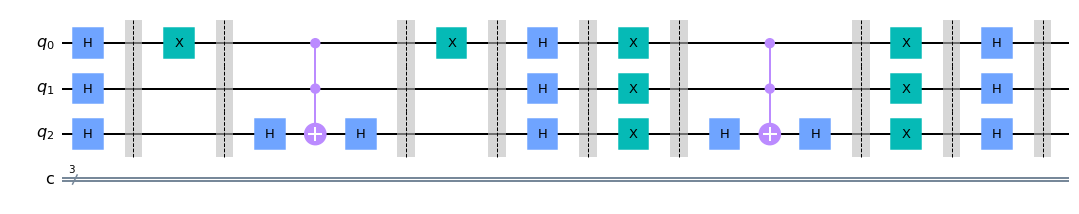

In [291]:
# Etape 1 : initiation de circuit en calculant le nombre des 
# Qubits à créer (basant sur N = len(N)) et en appliquant 
# la porte H sur chaque Qubit.

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
grover_cirquit_v1 = QuantumCircuit(qreg_q, creg_c)

grover_cirquit_v1.h(qreg_q[0])
grover_cirquit_v1.h(qreg_q[1])
grover_cirquit_v1.h(qreg_q[2])

grover_cirquit_v1.barrier()

# Etape 2 : marquage de l’état recherché 
# (ici dans l’exemple c’est l’état « 110 »). 
# Nous marquons les qubits '0' dans l'état avec une porte X

grover_cirquit_v1.x(qreg_q[0])

grover_cirquit_v1.barrier()

# Etape 3 création du modèle oracle Grover

grover_cirquit_v1.h(qreg_q[2])
grover_cirquit_v1.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
grover_cirquit_v1.h(qreg_q[2])

grover_cirquit_v1.barrier()

grover_cirquit_v1.x(qreg_q[0])

grover_cirquit_v1.barrier()

# Etape 4 : La première étape de l'opérateur de diffusion 
# de Grover. Appliquer des portes H à tous les 
# qubits.

grover_cirquit_v1.h(qreg_q[0])
grover_cirquit_v1.h(qreg_q[1])
grover_cirquit_v1.h(qreg_q[2])

grover_cirquit_v1.barrier()

# Etape 5 : La deuxième étape de l'opérateur de diffusion 
# pour inverser la moyenne.

grover_cirquit_v1.x(qreg_q[0])
grover_cirquit_v1.x(qreg_q[1])
grover_cirquit_v1.x(qreg_q[2])

grover_cirquit_v1.barrier()

grover_cirquit_v1.h(qreg_q[2])
grover_cirquit_v1.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
grover_cirquit_v1.h(qreg_q[2])

grover_cirquit_v1.barrier()

# Etape 6 :

grover_cirquit_v1.x(qreg_q[0])
grover_cirquit_v1.x(qreg_q[1])
grover_cirquit_v1.x(qreg_q[2])

grover_cirquit_v1.barrier()

grover_cirquit_v1.h(qreg_q[0])
grover_cirquit_v1.h(qreg_q[1])
grover_cirquit_v1.h(qreg_q[2])

grover_cirquit_v1.barrier()

grover_cirquit_v1.draw("mpl")

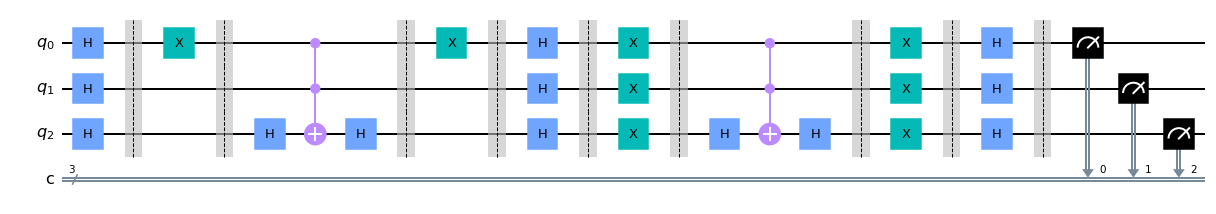

In [292]:
# Mesure
grover_cirquit_v1.measure(qreg_q[0], creg_c[0])
grover_cirquit_v1.measure(qreg_q[1], creg_c[1])
grover_cirquit_v1.measure(qreg_q[2], creg_c[2])

grover_cirquit_v1.draw("mpl")

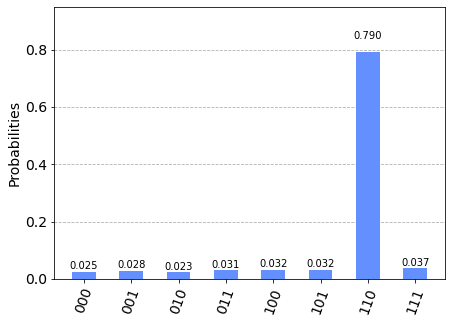

In [149]:
# Utilisation d'un simulateur locale: 
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_cirquit_v1, aer_sim, shots = 1024)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

Nous voyons ici que notre première expérience en locale est concluante car nous pouvons confirmer que dans la majorité des cas l'état |110⟩ est mesuré. Les autres résultats minimes sont dus à des erreurs dans le calcul quantique.  
Testons à présent sur machine réelle:

In [150]:
# Chargement de notre compte IBMQ sauvegardé et obtention du "backend device" le moins occupé avec 5 qubits ou moins.
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Exécuter et suivre le "job"
from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_circuit = transpile(grover_cirquit_v1, backend, optimization_level=3)
qobj = assemble(transpiled_circuit, shots=shots)
job = backend.run(qobj)
job_monitor(job, interval=2)

ibmqfactory.load_account:WARNING:2021-12-24 21:02:24,961: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


C:\Users\louis\AppData\Local\Temp/ipykernel_76360/1794815099.py:13: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


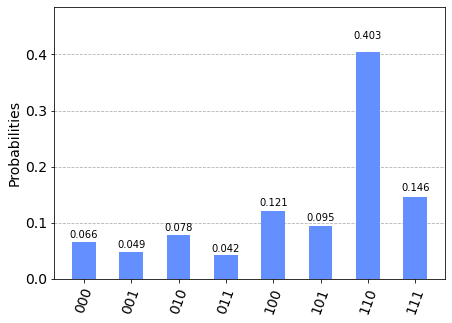

In [132]:
# Obtention des résultats et tracer du graph associé
device_counts = job.result().get_counts()
plot_histogram(device_counts)

Nous confirmons encore que dans la majorité des cas l'état | 110 ⟩ est mesuré. Les autres résultats sont dus à des erreurs dans le calcul quantique. Les autres résultats sont plus élevé que sur la simulation locale du au bruit causé sur les machines réelles.

<h2>Question 1: Généralisation: l’algorithme de recherche de 
Grover pour n qubits</h2>   

Ici, nous allons reprendre le travail réalisé préceddement ainsi que celui fait en cours pour générer un algorithme de recherche pour n qubits:  
Pour cela nous allons dans un premier temps créer une fonction: <code>markWinner</code> chargée de "marquer" l'élement: <code>winner</code> à trouver sur un circuit <code>qc</code> de <code>nqubits</code> qubits supposés initialisé en suprposition. Ici il est donc question de mettre en place  le premier composant: l'oracle de Grover  qui nous permer de signaler que l'état que nous recherchons sera identifié en changeant simplement le signe de l'état de positif à négatif.

In [160]:
def markWinner(qc,nqubits,winner): 
    # En supposant que tous les qubits du cicuit qc sont en superposition:
    # On cible le winner en reprenant le mécanisme réalisé dans l'exemple de l'introduction:
    i=nqubits-1
    for bit in winner:
        if bit == "0":
            qc.x(i)
        i-=1
    qc.barrier()
    # ... puis application de l'équivalent la porte C^nZ (porte multi-contrle Z)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # via l'utilisation de la porte multi-controle tofoli: C^nNOT
    qc.h(nqubits-1)
    qc.barrier()
    # ... et enfin:
    for bit in winner:
        if bit == "0":
            qc.x(i)
        i-=1
    qc.barrier()

Il reste à implément l'opérateur de diffusion de Grover pour un problème à n qubits permettant d'effectuer une étape mathématique connue sous le nom d'inversion de la moyenne. Comme expliqué dans l'énoncé du tp: cela inverse 
la distance entre la moyenne et le pic de chaque état. Cela revient à voir chaque état basculer par rapport à la moyenne. Nous avons vu en cours de façon détailler que cela revaenait à mettre en place un opérateur dit de réflexion.  
Encore une fois, pour réaliser cela, nous allons reprendre le code implémenté précédemment et le généraliser:

In [167]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Première étape de l'opérateur de diffusion de Grover. 
    # Appliquer des portes H à tous les qubits
    for qubit in range(nqubits):
        qc.h(qubit)
    # Deuxième étape de l'opérateur de diffusion pour inverser la moyenne:
    # application de la transformation -> |00..0> via la porte X
    for qubit in range(nqubits):
        qc.x(qubit)
    # Il s'agit à présent de mettre en place un opérateur dit de réflexion:
    # application de l'équivalent la porte C^nZ (porte multi-contrle Z)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # ensuite, application de la transformation |11..1> -> |00..0> via la porte X
    for qubit in range(nqubits):
        qc.x(qubit)
    # enfin, application de la transformation  via la porte H pour se rapprocher de l'état à determiner
    for qubit in range(nqubits):
        qc.h(qubit)
    # Ici nous retournons l'opérateur de diffusion comme une porte U_s pour ne pas trop charger le circuit
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

Finalement nous pouvons créer la fonction <code>grover_algo_circuit</code> qui à partir:
   - d'un nombre de qubits: <code>nqubits</code>
   - d'un état à rechercher <code>winer</code> à donner sous la forme d'une chaine de caractère de type "0101"
   - d'un nombre de répétition de l'oracle de Grover + l'opérateur de diffusion formant ce qu'on appelera plus globalement l'**opérateur de Grover**

retourne un circuit avec ses mesures permetant de déterminer l'état recherché.

In [162]:
def grover_algo_circuit(nqubits,winner,grover_op_rep):
    # Création du circuit:
    grover_circuit = QuantumCircuit(nqubits)
    # Initialisation du circuit:
    # On positionne l’entrée index dans l’état d’égale superposition 
    # de toutes les valeurs possibles avec nqubits portes d’Hadamard 
    for qubit in range(nqubits):
        grover_circuit.h(qubit)
    grover_circuit.barrier()
    # Enfin on applique grover_op_rep fois l'opérateur de Grover:
    # Précision importante: grover_op_rep doit être égale à environ (sqrt(2))**n
    # int(round(arccos(1/nqubits)/(2*arcsin(1/nqubits))))
    # pour que l'agorithme soit optimal
    for rep in range(grover_op_rep):
        markWinner(grover_circuit,nqubits,winner)
        grover_circuit.append(diffuser(nqubits), list(range(nqubits)))
    #Mesure
    grover_circuit.measure_all(nqubits)
    # On retourne le cicuit avec mesure:
    return grover_circuit

<h2>Question 2: Recherche des états suivants : « 101 », « 001 » et « 010 » à l'aide de l'algorithme de Grover implémenté précedemment.</h2>  

<h3>Recherche de l'état: "101" </h3>

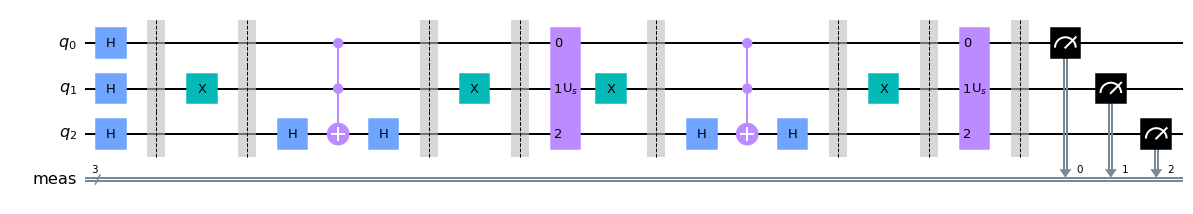

In [246]:
n = 3
circuit = grover_algo_circuit(n, "101", int(round(arccos(1/n)/(2*arcsin(1/n)))))
circuit.draw("mpl")

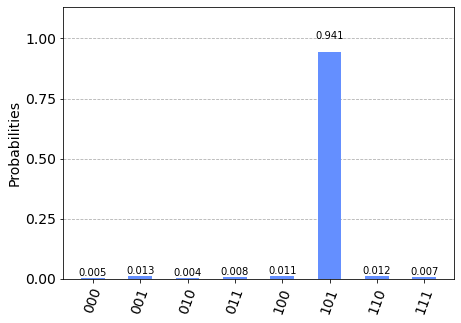

In [192]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit, shots = 1024)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

<h3>Recherche de l'état: "001" </h3>

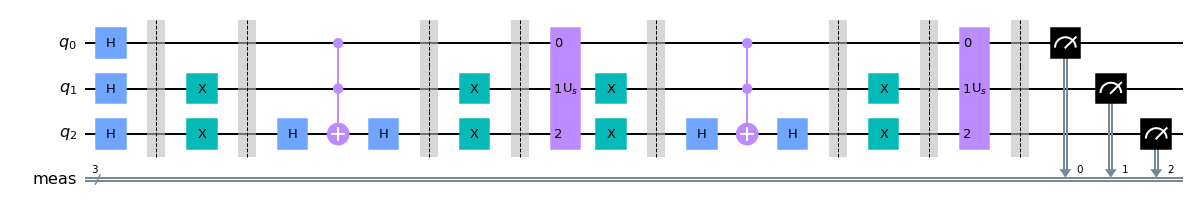

In [248]:
n = 3
circuit = grover_algo_circuit(n, "001", int(round(arccos(1/n)/(2*arcsin(1/n)))))
circuit.draw("mpl")

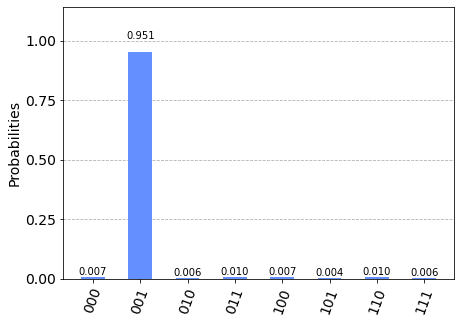

In [254]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit, shots = 1024)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

<h3>Recherche de l'état: "010" </h3>

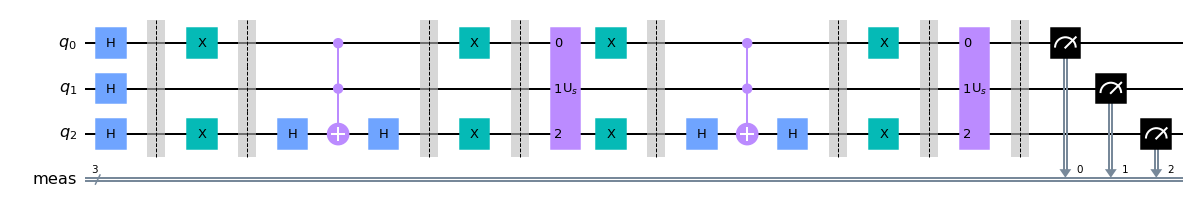

In [256]:
n = 3
circuit = grover_algo_circuit(n, "010", int(round(arccos(1/n)/(2*arcsin(1/n)))))
circuit.draw("mpl")

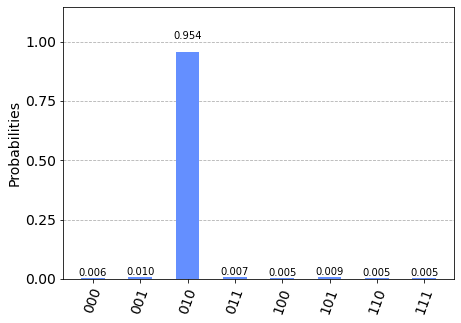

In [271]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit, shots = 1024)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Dans les 3 cas de recherche, on peut constater que l'algorithme implémenté (et utilisé ici avec le nombre optimisé de répétition de l'application de l'opérateur de Grover) fonctionne très bien.

<h2>Question 3: Combien d'itérations de l'algorithme de Grover il faut exécuter pour trouver l'état |10101> ?</h2>  

Pour trouver un tel état il faut utiliser un cicuit à $n=5$ qubits. D'après l'énoncé  et ce qui fut vue en cours et dit pécedemment, il faut réaliser:
- d'après l'énoncé du TP:  
$\sqrt{2}^n = \sqrt{2}^5 \approx 5.656854249492382 \approx 6$ itérations de l'algorithme de Grover 
- ou d'apprès le cours: 
$\frac{\arccos{\frac{1}{n}}}{2 \arcsin{\frac{1}{n}}} \approx 3.400507913047358 \approx 3$  

pour trouver de manière optimisé l'état |10101>.  
Précedement nous avons utilisé la formule du cours néanmoins ici le nombre de répétition étant assez différent selon les 2 formule il est préférable d'essayer les 2:

<h3>Recherche de l'état: "10101" en $\sqrt{2}^5 \approx 6$ itérations de l'agorithme de Grover </h3>

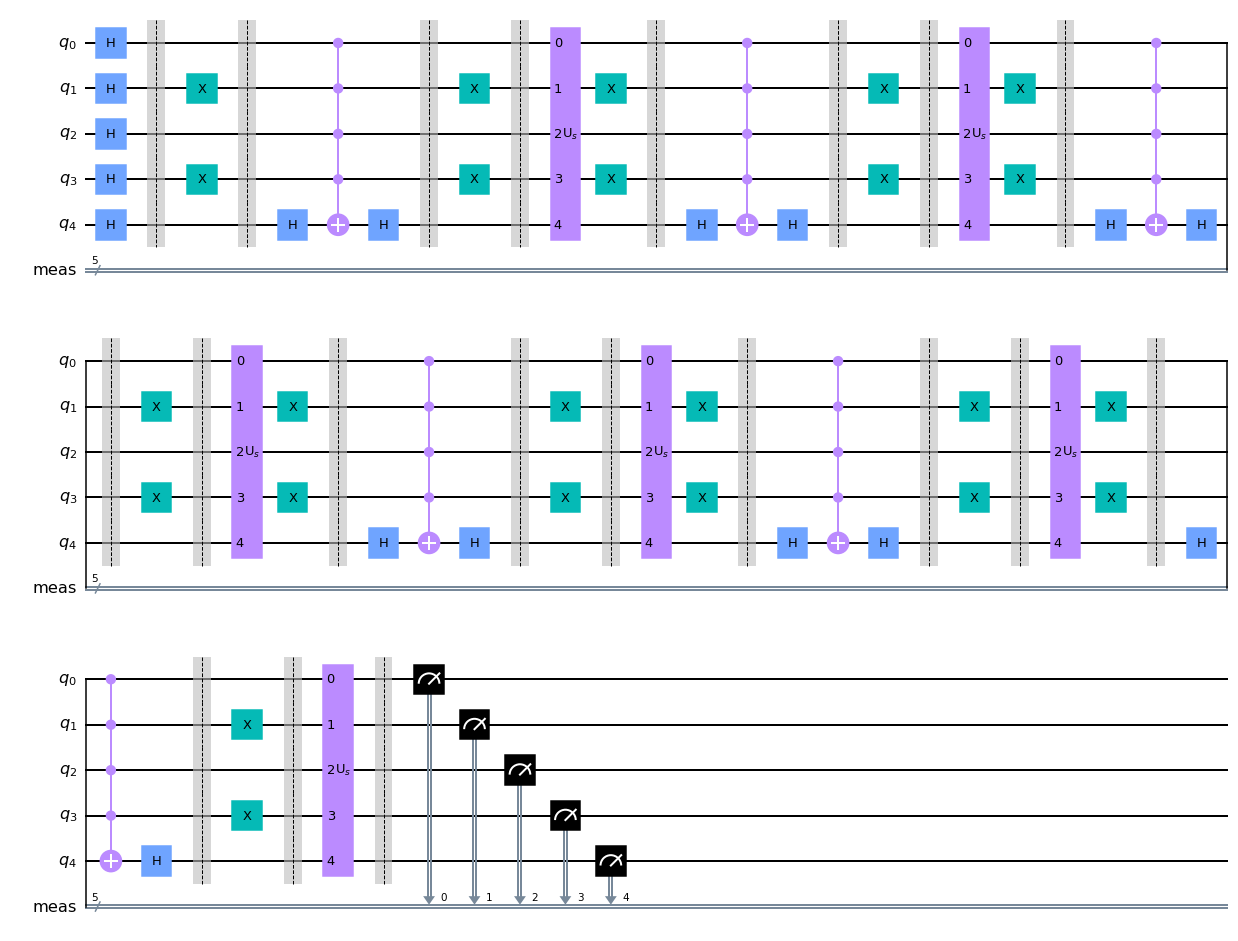

In [293]:
n = 5
circuit = grover_algo_circuit(n, "10101", int(round(((sqrt(2))**n))))
circuit.draw("mpl")

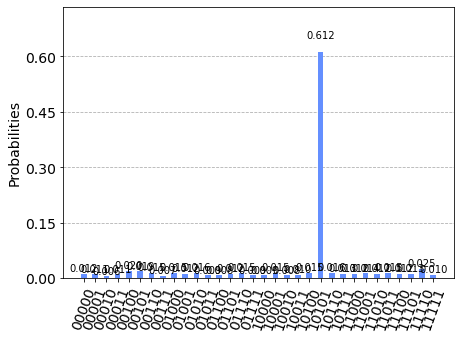

In [312]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit, shots = 1024)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

<h3>Recherche de l'état: "10101" en $\frac{\arccos{\frac{1}{5}}}{2 \arcsin{\frac{1}{5}}} \approx 3$ itérations de l'agorithme de Grover </h3>

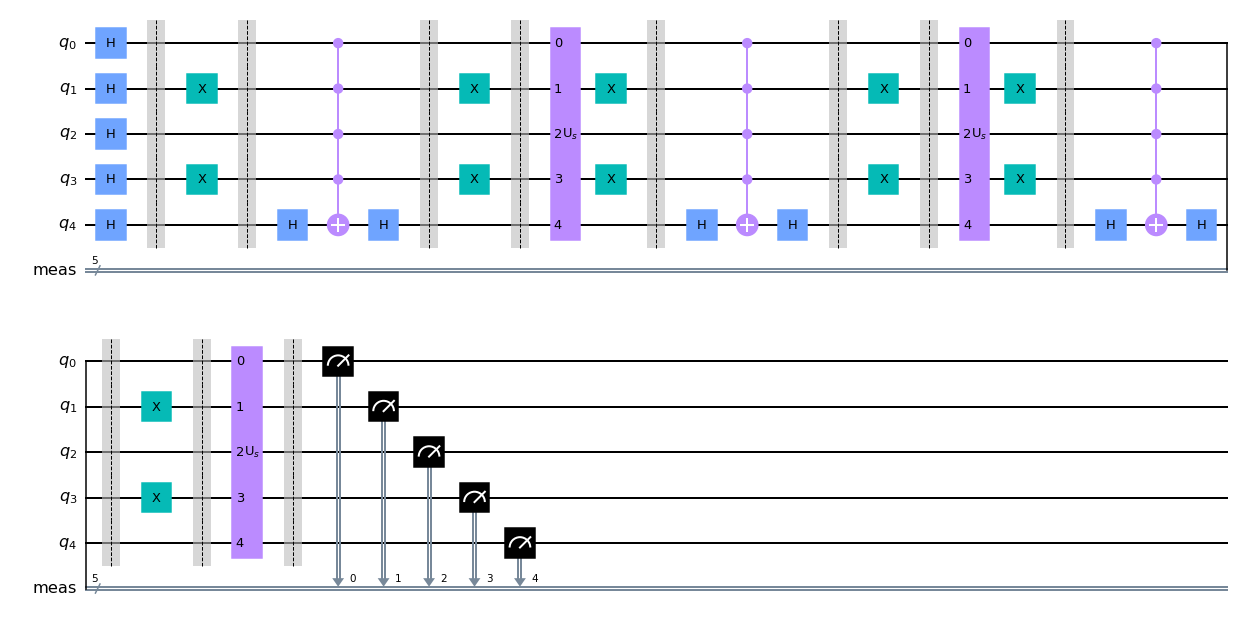

In [295]:
n = 5
circuit = grover_algo_circuit(n, "10101", int(round(arccos(1/n)/(2*arcsin(1/n)))))
circuit.draw("mpl")

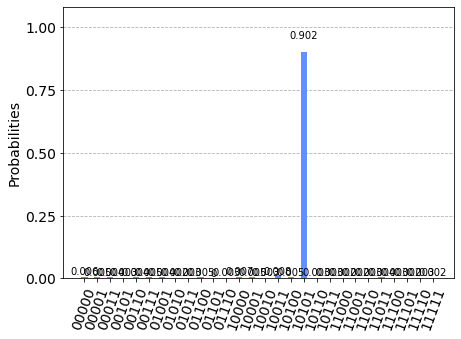

In [297]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit, shots = 1024)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

On constate que la formule du cours offre une probabilité bien supérieur de mesurer l'état recherché une fois l'algoritme appliqué et donc que nous avons bien fait de faire la comparaison

<h2>Question 4: Réexécutez l'exemple de recherche de Grover en ne répétant que deux fois l'oracle de Grover et 
l'opérateur de diffusion et notez la différence dans le résultat. Expliquer cette différence ? 
Quel changement attendiez-vous si vous l'exécutiez trois fois </h2>

<h3> Exécution de l'exemple de recherche de Grover de la question précédente en ne répétant que deux fois l'opérateur de Grover: </h3>

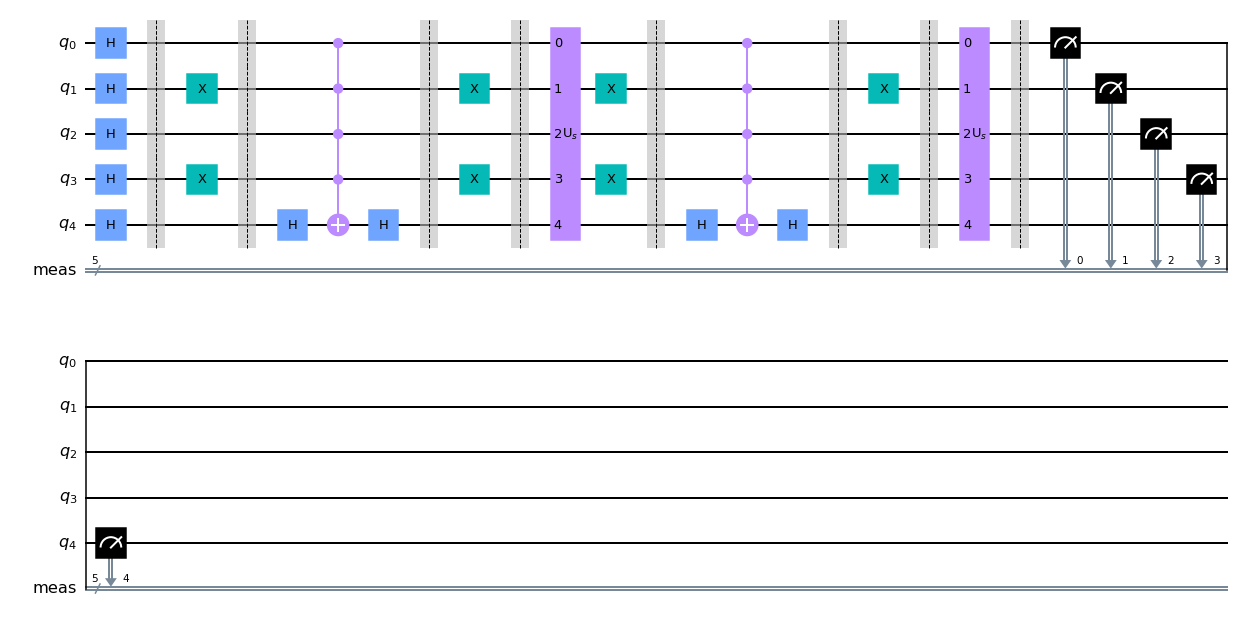

In [298]:
n = 5
circuit = grover_algo_circuit(n, "10101", 2)
circuit.draw("mpl")

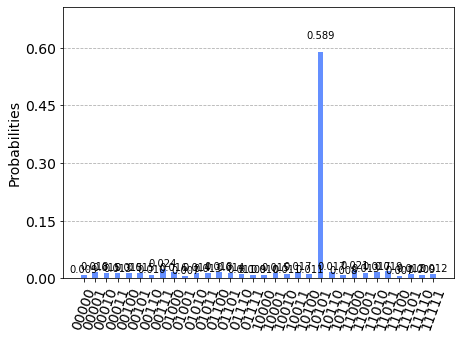

In [311]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit, shots = 1024)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

<h3> Constat et Réponse: </h3> 

Ici on constate que la probabilité de mesurer l'état recherché en seulement 2 itération est bien inférieur à celle obtenue précédemment en 3 itérations. On en déduit que l'opérateur de Grover n'est passez appliqué pour nous rapprocher le plus possible de l'état recherché. On s'attend donc (et nous avons déjà constaté) qu'en executant 3 fois l'opérateur de Groveur nous obtiendrons un meilleur résultat. Néanmons comme vu en cours et constaté dans la question précédente: augmenter sans cesse le nombre de répétition n'aboutira pas forcément à une amélioration du résultat (cf. cours 10 : interprétation géométrique de l'algorithme de Grover).